# Step 2: Download Top 100 Hot Latin Songs List on Billboard.com

    - Web scrape multiple pages using loop in Beautifulsoup and save in dataframe by row

In [17]:
import pandas as pd
import numpy as np
import requests
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from bs4 import BeautifulSoup
import lyricsgenius as genius
import sys
import re
import string
from datetime import datetime
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy
from collections import Counter
from os import path
from PIL import Image
pd.options.mode.chained_assignment = None
%config InlineBackend.figure_format = 'png'

In [39]:
def collect_songs_from_billboard(start_year,end_year):
    years = np.arange(start_year, end_year + 1).astype(int)
    dataset = pd.DataFrame()
    url_list = []
    all_years = pd.DataFrame()
    for i in range (0, len(years)):
        url_list.append("https://www.billboard.com/charts/year-end/" + str(years[i]) + "/hot-latin-songs")      
    for i in range(0, len(url_list)):
            sys.stdout.write("\r" + "Collecting Songs from " +str(years[i]) + " via https://www.billboard.com")
            sys.stdout.flush()
            url = "https://www.billboard.com/charts/year-end/" + str(years[i]) + "/hot-latin-songs"
            page = requests.get(url)
            soup = BeautifulSoup(page.content, "html.parser")
            all_ranks = soup.find_all("div", class_="ye-chart-item__rank")
            all_titles = soup.find_all('div', class_="ye-chart-item__title")
            all_artists = soup.find_all("div", class_="ye-chart-item__artist")
            for j in range (0, len(all_ranks)):
                row = {
                    "Rank": all_ranks[j].get_text(strip=True),
                    "Song Title": all_titles[j].get_text(strip=True),
                    "Artist": all_artists[j].get_text(strip=True),
                    "Year": years[i]
                }
                dataset = dataset.append(row, ignore_index=True)
    dataset['Year'] = dataset['Year'].astype(int)
    return dataset

In [47]:
all_songs = collect_songs_from_billboard(2006, 2018) #Billboard goes back to 2006

In [48]:
display(all_songs.head(5))
display(all_songs.tail(5))
display(all_songs.shape)
#top 100 songs per year from 2006 to 2018 --> 1056 songs

,Artist,Rank,Song Title,Year
0,RKM & Ken-Y,1,Down,2006
1,Shakira Featuring Wyclef Jean,2,Hips Don't Lie,2006
2,Daddy Yankee,3,Rompe,2006
3,Mariano Barba,4,Aliado Del Tiempo,2006
4,Wisin & Yandel,5,Llame Pa' Verte,2006


,Artist,Rank,Song Title,Year
1051,Banda La Misma Tierra,96,Si No Estas Tu,2018
1052,Silvestre Dangond & Natti Natasha,97,Justicia,2018
1053,Raymix,98,Donde Estaras,2018
1054,Lenin Ramirez Featuring T3r Elemento,99,Rolling One,2018
1055,T3r Elemento,100,Rafa Caro,2018


(1056, 4)

In [49]:
pd.DataFrame(all_songs).to_excel('Latin_Songs.xlsx', header=True, index=True)

Resources/Citation for Code:
- https://github.com/sharpie-007/dataAndMusic/blob/master/49%20Years%20of%20Music%20-%20Collection%20and%20Analysis.ipynb

# Step 3: Plot Data on Song List for Influencial Artist 

    - Matplotlib and Seaborn graphs from dataframes

### Top Artists on #1 Hit List

In [1]:
import pandas as pd
df = pd.read_excel('Latin_Songs.xlsx',sheet_name='Sheet1')
df.head(10)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,Artist,Rank,Song Title,Year
0,RKM & Ken-Y,1,Down,2006
1,Shakira Featuring Wyclef Jean,2,Hips Don't Lie,2006
2,Daddy Yankee,3,Rompe,2006
3,Mariano Barba,4,Aliado Del Tiempo,2006
4,Wisin & Yandel,5,Llame Pa' Verte,2006
5,Daddy Yankee,7,Machucando,2006
6,Don Omar,8,Angelito,2006
7,Aventura,9,Un Beso,2006
8,Mana,10,Labios Compartidos,2006
9,Aventura Featuring Don Omar,11,Ella Y Yo,2006


In [5]:
df.shape

(1056, 4)

In [8]:
df['Artist'].value_counts(normalize=True) *100

La Arrolladora Banda el Limon de Rene Camacho                          2.083333
Daddy Yankee                                                           1.799242
Calibre 50                                                             1.799242
Gerardo Ortiz                                                          1.704545
Banda Sinaloense MS de Sergio Lizarraga                                1.704545
Prince Royce                                                           1.515152
Julion Alvarez y Su Norteno Banda                                      1.515152
Romeo Santos                                                           1.515152
Banda El Recodo de Cruz Lizarraga                                      1.325758
Juanes                                                                 1.231061
Banda Los Recoditos                                                    1.231061
Don Omar                                                               1.136364
Intocable                               

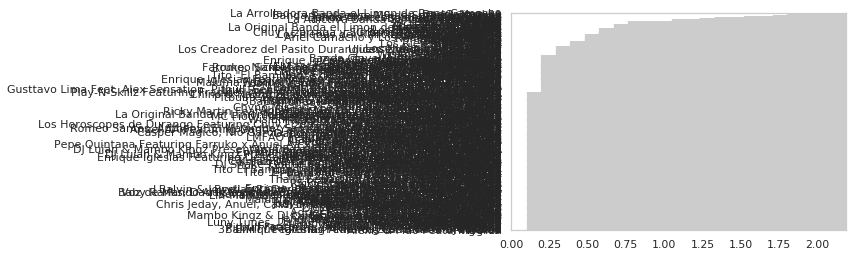

In [26]:
artist = df['Artist'].value_counts(normalize=True) *100
artist.plot.barh().invert_yaxis()

In [9]:
top20_solo = df[(df['Artist'] == 'La Arrolladora Banda el Limon de Rene Camacho') | (df['Artist'] == 'Calibre 50') | 
                (df['Artist'] == 'Daddy Yankee') | (df['Artist'] == 'Gerardo Ortiz') | 
                (df['Artist'] == 'Banda Sinaloense MS de Sergio Lizarraga') | 
                (df['Artist'] == 'Romeo Santos') | (df['Artist'] == 'Prince Royce') | 
                (df['Artist'] == 'Julion Alvarez y Su Norteno Banda') | (df['Artist'] == 'Banda El Recodo de Cruz Lizarraga') | 
                (df['Artist'] == 'Banda Los Recoditos') | (df['Artist'] == 'Juanes') | (df['Artist'] == 'Don Omar') | 
                (df['Artist'] == 'Wisin & Yandel') | (df['Artist'] == 'La Adictiva Banda San Jose de Mesillas') | 
                (df['Artist'] == 'Intocable') | (df['Artist'] == 'Aventura') | (df['Artist'] == 'J Balvin') | (df['Artist'] == 'Ricardo Arjona') | 
                (df['Artist'] == 'Banda Carnaval') | (df['Artist'] == 'Mana') | (df['Artist'] == 'Voz de Mando') ]
print(top20_solo['Artist'].value_counts())

La Arrolladora Banda el Limon de Rene Camacho    22
Daddy Yankee                                     19
Calibre 50                                       19
Gerardo Ortiz                                    18
Banda Sinaloense MS de Sergio Lizarraga          18
Julion Alvarez y Su Norteno Banda                16
Romeo Santos                                     16
Prince Royce                                     16
Banda El Recodo de Cruz Lizarraga                14
Juanes                                           13
Banda Los Recoditos                              13
Don Omar                                         12
La Adictiva Banda San Jose de Mesillas           11
Wisin & Yandel                                   11
Intocable                                        11
Aventura                                          9
J Balvin                                          8
Banda Carnaval                                    8
Ricardo Arjona                                    8
Voz de Mando

In [11]:
top20_solo['Artist'].value_counts(normalize=True) *100

La Arrolladora Banda el Limon de Rene Camacho    7.913669
Daddy Yankee                                     6.834532
Calibre 50                                       6.834532
Gerardo Ortiz                                    6.474820
Banda Sinaloense MS de Sergio Lizarraga          6.474820
Julion Alvarez y Su Norteno Banda                5.755396
Romeo Santos                                     5.755396
Prince Royce                                     5.755396
Banda El Recodo de Cruz Lizarraga                5.035971
Juanes                                           4.676259
Banda Los Recoditos                              4.676259
Don Omar                                         4.316547
La Adictiva Banda San Jose de Mesillas           3.956835
Wisin & Yandel                                   3.956835
Intocable                                        3.956835
Aventura                                         3.237410
J Balvin                                         2.877698
Banda Carnaval

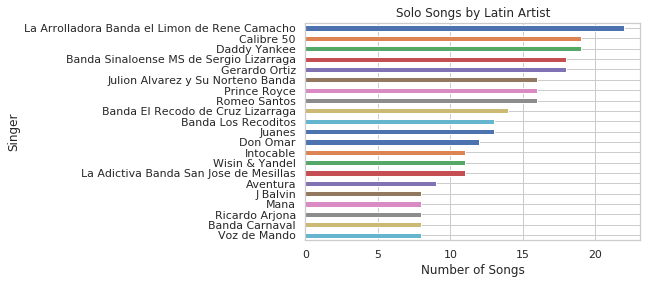

In [32]:
#matplotlib
Top20Solo = top20_solo['Artist'].value_counts()
plt.title('Solo Songs by Latin Artist')
plt.xlabel('Number of Songs')
plt.ylabel('Singer') 
Top20Solo.plot.barh().invert_yaxis() #descends order 

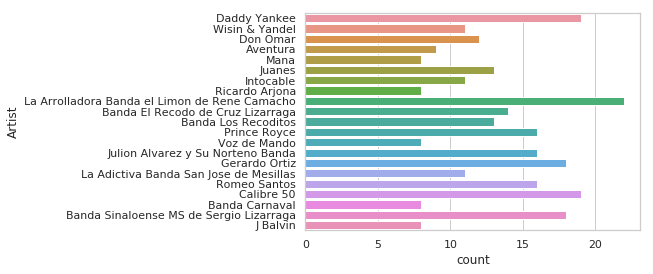

In [33]:
#seaborn
import seaborn as sns
sns.set(style="whitegrid")
p = sns.countplot(data=top20_solo, y = "Artist")

In [12]:
df.query("Artist=='Shakira'")

,Artist,Rank,Song Title,Year
152,Shakira,9,Loba,2009
269,Shakira,32,Did It Again (Lo Hecho Esta Hecho),2010
271,Shakira,34,Gitana,2010
364,Shakira,54,Sale El Sol,2011
413,Shakira,28,Addicted To You,2012
592,Shakira,36,Nunca Me Acuerdo de Olvidarte,2014
866,Shakira,11,Me Enamore,2017


In [2]:
Shakira = df[df['Artist'].str.contains("Shakira")]
Shakira['Art_Code'] = 'Shakira'
Balvin = df[df['Artist'].str.contains("J Balvin")]
Balvin['Art_Code'] = 'Balvin'
Arrolladora = df[df['Artist'].str.contains("La Arrolladora Banda el Limon de Rene Camacho")]
Arrolladora['Art_Code'] = 'Arrolladora'
Yankee = df[df['Artist'].str.contains("Daddy Yankee")]
Yankee['Art_Code'] = 'Daddy Yankee'
Calibre = df[df['Artist'].str.contains("Calibre 50")]
Calibre['Art_Code'] = 'Calibre 50'
Gerardo = df[df['Artist'].str.contains("Gerardo Ortiz")]
Gerardo['Art_Code'] = 'Gerardo Ortiz'
Sinaloense = df[df['Artist'].str.contains("Banda Sinaloense MS de Sergio Lizarraga")]
Sinaloense['Art_Code'] = 'Sinaloense'
Romeo = df[df['Artist'].str.contains("Romeo Santos")]
Romeo['Art_Code'] = 'Romeo Santos'
Royce = df[df['Artist'].str.contains("Prince Royce")]
Royce['Art_Code'] = 'Prince Royce'
Alvarez = df[df['Artist'].str.contains("Julion Alvarez y Su Norteno Banda")]
Alvarez['Art_Code'] = 'Julion Alvarez'
Lizarraga = df[df['Artist'].str.contains("Banda El Recodo de Cruz Lizarraga")]
Lizarraga['Art_Code'] = 'Lizarraga'
Recoditos = df[df['Artist'].str.contains("Banda Los Recoditos")]
Recoditos['Art_Code'] = 'Banda Los Recoditos'
Juanes = df[df['Artist'].str.contains("Juanes")]
Juanes['Art_Code'] = 'Juanes'
Omar = df[df['Artist'].str.contains("Don Omar")]
Omar['Art_Code'] = 'Don Omar'
Wisin = df[df['Artist'].str.contains("Wisin & Yandel")]
Wisin['Art_Code'] = 'Wisin & Yandel'
Mesillas = df[df['Artist'].str.contains("La Adictiva Banda San Jose de Mesillas")]
Mesillas['Art_Code'] = 'Mesillas'
Intocable = df[df['Artist'].str.contains("Intocable")]
Intocable['Art_Code'] = 'Intocable'
Aventura = df[df['Artist'].str.contains("Aventura")]
Aventura['Art_Code'] = 'Aventura'
Arjona = df[df['Artist'].str.contains("Ricardo Arjona")]
Arjona['Art_Code'] = 'Ricardo Arjona'
Ozuna = df[df['Artist'].str.contains("Ozuna")]
Ozuna['Art_Code'] = 'Ozuna'

/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [3]:
top_20 = pd.concat([Shakira,Balvin,Arrolladora,Yankee,Calibre,Gerardo,Sinaloense,Romeo,Royce,Alvarez,Lizarraga,Recoditos,Juanes,Omar,Wisin,Mesillas,Intocable,Aventura,Arjona,Ozuna])
top_20.head(10)

,Artist,Rank,Song Title,Year,Art_Code
1,Shakira Featuring Wyclef Jean,2,Hips Don't Lie,2006,Shakira
34,Shakira Featuring Alejandro Sanz,36,La Tortura,2006,Shakira
82,Alejandro Sanz Featuring Shakira,36,"Te Lo Agradezco, Pero No",2007,Shakira
152,Shakira,9,Loba,2009,Shakira
266,Shakira Featuring Freshlyground,29,Waka Waka (This Time For Africa),2010,Shakira
269,Shakira,32,Did It Again (Lo Hecho Esta Hecho),2010,Shakira
271,Shakira,34,Gitana,2010,Shakira
290,Shakira Featuring El Cata,53,Loca,2010,Shakira
323,Shakira Featuring El Cata,11,Loca,2011,Shakira
338,Shakira Featuring Pitbull Or El Cata,27,Rabiosa,2011,Shakira


In [7]:
top_20['Art_Code'].value_counts()

Daddy Yankee           43
Ozuna                  36
Romeo Santos           36
Balvin                 26
Prince Royce           23
Don Omar               22
Arrolladora            22
Shakira                22
Calibre 50             21
Wisin & Yandel         21
Gerardo Ortiz          20
Sinaloense             18
Julion Alvarez         16
Lizarraga              14
Banda Los Recoditos    13
Juanes                 13
Aventura               12
Mesillas               11
Intocable              11
Ricardo Arjona          9
Name: Art_Code, dtype: int64

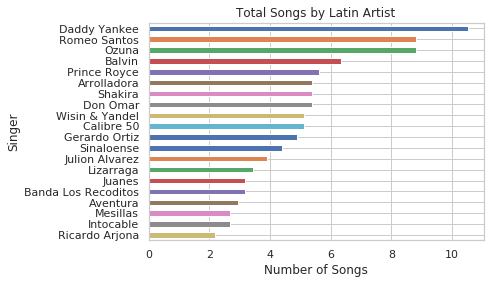

In [36]:
top_artist = top_20['Art_Code'].value_counts(normalize=True) *100
plt.title('Total Songs by Latin Artist')
plt.xlabel('Number of Songs')
plt.ylabel('Singer') 
top_artist.plot.barh().invert_yaxis() 

In [18]:
top_artist #percent of artist influence out of top 20

Daddy Yankee           10.513447
Romeo Santos            8.801956
Ozuna                   8.801956
Balvin                  6.356968
Prince Royce            5.623472
Arrolladora             5.378973
Shakira                 5.378973
Don Omar                5.378973
Wisin & Yandel          5.134474
Calibre 50              5.134474
Gerardo Ortiz           4.889976
Sinaloense              4.400978
Julion Alvarez          3.911980
Lizarraga               3.422983
Juanes                  3.178484
Banda Los Recoditos     3.178484
Aventura                2.933985
Mesillas                2.689487
Intocable               2.689487
Ricardo Arjona          2.200489
Name: Art_Code, dtype: float64

Summary of Top Latin Artists: 
- While La Arrolladora Banda el Limon de Rene Camacho and Calibre 50 released the most solo songs on their own, Daddy Yankee, Romeo Santos, Ozuna, and J Balvin released the most individual and collaboration songs combined in the 12 year period between 2006 and 2018. 
- This relates to the word count as their names and lyrics become influencial in the most common Spanish word list.